In [1]:
import json
import requests
import seaborn as sb
import datetime
import pandas as pd
import numpy as np
api = "https://api.jikan.moe/v4/"

In [2]:
def sendRequest(payload):
	url = api+payload
	response = requests.get(url)
	return json.loads(response.text)
	
def getSeasonalAnime(season, year):
	payload='seasons/{0}/{1}'.format(year,season)
	t = sendRequest(payload)
	with open('sample.json', 'w') as outfile:
		outfile.write(json.dumps(t, indent=2))
	vals = ['score','type','episodes','title_english']
	data = []
	for x in t.get('data'):
		anime = []
		for y in vals:
			anime.append(x.get(y))
		genres = [g.get('name') for g in x.get('genres')]
		anime.append(genres)
		print(anime)
		data.append(anime)
	return data

def getSpecificAnime(id):
	payload='anime/{}'.format(id)
	t = sendRequest(payload)
	vals = ['type','source','episodes','score']
	data = [t.get('data').get(x) for x in vals]
	genres = [x.get('name') for x in t.get('data').get('genres')]
	data.append(genres)
	return data

In [3]:
t = getSeasonalAnime('fall','2022')

[None, 'TV', None, 'Chainsaw Man', ['Action', 'Adventure']]
[None, 'TV', None, 'Mob Psycho 100 III', ['Action', 'Comedy', 'Supernatural']]
[None, 'TV', None, 'My Hero Academia Season 6', ['Action']]
[None, 'TV', 13, None, ['Action', 'Comedy']]
[None, 'TV', None, 'Bleach: Thousand-Year Blood War', ['Action', 'Adventure', 'Fantasy']]
[None, 'TV', None, 'To Your Eternity Season 2', ['Adventure', 'Drama', 'Supernatural']]
[None, 'TV', None, 'Uzaki-chan Wants to Hang Out! Double', ['Comedy', 'Ecchi']]
[None, 'TV', None, 'Blue Lock', ['Sports']]
[None, 'TV', None, 'The Eminence in Shadow', ['Action', 'Comedy', 'Fantasy']]
[None, 'TV', None, 'Welcome to Demon School! Iruma-kun Season 3', ['Comedy', 'Fantasy', 'Supernatural']]
[None, 'TV', 8, None, ['Action', 'Sci-Fi', 'Slice of Life']]
[None, 'TV', None, 'Golden Kamuy Season 4', ['Action', 'Adventure']]
[None, 'TV', 46, 'Urusei Yatsura', ['Comedy', 'Romance', 'Sci-Fi']]
[None, 'TV', None, None, ['Action', 'Fantasy']]
[None, 'TV', None, None, 

In [4]:
df = pd.DataFrame(t, columns=['score','type','episodes','EnglishTitle','genres'])
df.head()

,score,type,episodes,EnglishTitle,genres
0,None,TV,NaN,Chainsaw Man,"[Action, Adventure]"
1,None,TV,NaN,Mob Psycho 100 III,"[Action, Comedy, Supernatural]"
2,None,TV,NaN,My Hero Academia Season 6,[Action]
3,None,TV,13.0,None,"[Action, Comedy]"
4,None,TV,NaN,Bleach: Thousand-Year Blood War,"[Action, Adventure, Fantasy]"


In [141]:
animeDf = pd.read_csv('anime.csv')

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [142]:
animeDf[animeDf.Premiered == "Unknown"]

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
21,31,Neon Genesis Evangelion: Death & Rebirth,7.45,"Drama, Mecha, Psychological, Sci-Fi",Neon Genesis Evangelion:Death & Rebirth,新世紀エヴァンゲリオン劇場版 シト新生,Movie,1,"Mar 15, 1997",Unknown,...,13516.0,15245.0,23683.0,25396.0,12694.0,6313.0,2636.0,1042.0,654.0,737.0
22,32,Neon Genesis Evangelion: The End of Evangelion,8.51,"Sci-Fi, Dementia, Psychological, Drama, Mecha",Neon Genesis Evangelion:The End of Evangelion,新世紀エヴァンゲリオン劇場版 THE END OF EVANGELION,Movie,1,"Jul 19, 1997",Unknown,...,127081.0,95821.0,77593.0,41261.0,16444.0,7057.0,4493.0,2279.0,1941.0,2264.0
24,43,Koukaku Kidoutai,8.29,"Action, Mecha, Police, Psychological, Sci-Fi, ...",Ghost in the Shell,GHOST IN THE SHELL（攻殻機動隊）,Movie,1,"Nov 18, 1995",Unknown,...,56237.0,65298.0,70881.0,39446.0,13704.0,5107.0,1842.0,675.0,292.0,486.0
25,44,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,8.73,"Action, Historical, Drama, Romance, Martial Ar...",Samurai X:Trust and Betrayal,るろうに剣心―明治剣客浪漫譚―追憶編,OVA,4,"Feb 20, 1999 to Sep 22, 1999",Unknown,...,39845.0,33317.0,25800.0,11782.0,3575.0,1393.0,448.0,163.0,106.0,490.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17555,48471,Tsuki to Laika to Nosferatu,Unknown,"Sci-Fi, Space, Vampire",Unknown,月とライカと吸血姫,TV,Unknown,2021 to ?,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17556,48480,Wan Jie Shen Zhu 3rd Season,Unknown,"Adventure, Fantasy",Unknown,万界神主 第三季,ONA,48,"Mar 17, 2021 to ?",Unknown,...,Unknown,Unknown,2.0,1.0,1.0,Unknown,Unknown,Unknown,Unknown,Unknown
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,...,Unknown,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [148]:
def setPremiered(id):
	premiered = animeDf[animeDf.MAL_ID == id]['Premiered'].values[0]
	if premiered is np.NaN or premiered == "Unknown":
		premiered = animeDf[animeDf.MAL_ID == id]['Aired'].values[0]
		if premiered is np.NaN or premiered == "Unknown":
			premiered = np.NaN
	return premiered
animeDf.Premiered = animeDf.MAL_ID.apply(lambda x: setPremiered(x))

In [6]:
def getAnimeName(id):
	name = animeDf[animeDf.MAL_ID == id]['English name'].values[0]
	if name is np.nan or name == "Unknown":
		name = animeDf[animeDf.MAL_ID == id]['Name'].values[0]
	return name

animeDf['eng_name'] = animeDf.MAL_ID.apply(lambda x :getAnimeName(x) )
animeDf = animeDf[['Score','Ranked','Genres','eng_name','Type','Episodes','Source','Studios','Premiered']]
animeDf = animeDf[animeDf.Score != 'Unknown']
animeDf = animeDf[animeDf.Ranked!= 'Unknown']
animeDf = animeDf[animeDf.Episodes != 'Unknown']

animeDf.Score = animeDf.Score.apply(lambda x: float(x))
animeDf.Ranked = animeDf.Ranked.apply(lambda x: float(x))
animeDf.Episodes = animeDf.Episodes.apply(lambda x: int(x))

In [149]:
animeDf.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001","Sep 1, 2001",...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [8]:
s = animeDf.Studios.value_counts()
studioDf = animeDf[animeDf.Studios.isin(s.index[s.gt(50)])]
studioDf = studioDf[studioDf.Studios != 'Unknown']
studioDf.shape

(4818, 8)

<AxesSubplot:ylabel='Frequency'>

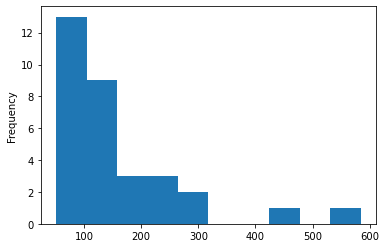

In [9]:
studioDf.Studios.value_counts().plot.hist()
# studioDf.Studios.value_counts()

In [10]:
def getGenreDf(df):
	l = df.Genres.to_numpy()
	l= [x.split(',') for x in l]
	uniqueGenres = []
	for x in l:
		for y in x:
			y.strip()
			if y not in uniqueGenres:
				uniqueGenres.append(y)
	uniqueGenres = np.array(uniqueGenres)
	uniqueGenres = [x.strip() for x in uniqueGenres]
	uniqueGenres = np.unique(uniqueGenres)
	genreCol = df.Genres
	index = df.index
	t = []
	for x in genreCol:
		ohe = np.zeros(len(uniqueGenres))
		genres = x.split(',')
		genres = [y.strip() for y in genres]
		for y in genres:
			index = np.where(uniqueGenres == y)
			ohe[index[0][0]] = 1
		t.append(ohe)
	#t = pd.Series(t, name='Genres', index=animeDf.index)
	genresDf = pd.DataFrame(t, columns=uniqueGenres, index=df.index)
	# genresDf.drop('Unknown',axis=1, inplace=True)
	return genresDf

In [11]:
gdf = getGenreDf(studioDf)
studioDf.drop('Genres',axis=1, inplace=True)
studioDf = studioDf.join(gdf)

In [12]:
studioDf

,Score,Ranked,eng_name,Type,Episodes,Source,Studios,Action,Adventure,Cars,...,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
0,8.78,28.0,Cowboy Bebop,TV,26,Original,Sunrise,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,8.39,159.0,Cowboy Bebop:The Movie,Movie,1,Original,Bones,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,8.24,266.0,Trigun,TV,26,Manga,Madhouse,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.27,2481.0,Witch Hunter Robin,TV,26,Original,Sunrise,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,6.98,3710.0,Beet the Vandel Buster,TV,52,Manga,Toei Animation,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17260,7.13,3082.0,Dr. Stone:Stone Wars Eve of the Battle Special...,Special,1,Manga,TMS Entertainment,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17279,7.72,976.0,Boku no Hero Academia the Movie 2: Heroes:Risi...,Special,1,Manga,Bones,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17374,5.87,8634.0,Senyoku no Sigrdrifa: Dai-909 Senjutsu Hime-ta...,Special,1,Original,A-1 Pictures,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17375,8.18,329.0,Fate/Grand Carnival,OVA,4,Game,Lerche,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [104]:
import matplotlib.pyplot as plt
def getStudio(studioName):
	studio = studioDf[studioDf.Studios == studioName]
	studio = studio.drop('Studios',axis=1)
	return studio
bones = getStudio('Bones')

In [137]:
def plotStudio(studio):
	sb.set_style("darkgrid")
	sb.color_palette("colorblind")
	fig, ax = plt.subplots(figsize=(10,10))
	sb.histplot(data=studio, x= "Score",multiple="stack", hue=studio.Source, bins=np.arange(round( min(studio.Score) )-.5, max(studio.Score)+1, .5))
	plt.xticks(np.arange(round( min(studio.Score) )-.5, max(studio.Score)+1, .5))
	# sns.distplot(a=b, hist=True, bins=np.arange(min(b)-0.5, max(b)+1, 1))
	# plt.xticks(np.arange(min(b), max(b) + 1, 1))
	# plt.xlabel('Age Dog', fontsize=12)
	plt.title('Studio Distribution of Scores based off of Source Material', fontsize=20)
	plt.xlim(min(studio.Score)-1, max(studio.Score) + 1)
	print(studio[["eng_name","Score"]].where(studio.Score>=8.5).dropna())

	sources = studio.Source.unique()
	sb.set_style("darkgrid")
	sb.color_palette("colorblind")
	fig, ax = plt.subplots(ncols=round(len(studio.Source.unique())//2)+1,
							nrows=2, 
							figsize=(35,8), 
							sharey=True, 
							sharex=True)
	plt.xticks(np.arange(round( min(studio.Score) )-.5, max(studio.Score)+1, .5))
	ax = ax.flatten()
	plt.subplots_adjust(left=0.1,
						bottom=0.1, 
						right=0.9, 
						top=0.9, 
						wspace=0.4, 
						hspace=1.4)
	for x,i in enumerate(sources):
		ax[x].title.set_text("{0} distribution of scores".format(i))
		ax[x].text(10.3,3,'{} total count'.format(len(studio[studio.Source == i])), fontsize=12)
		sb.histplot(data=studio[studio.Source == i], x="Score",ax=ax[x],bins=np.arange(round( min(studio.Score) )-.5, max(studio.Score)+1, .5))


                              eng_name  Score
3971   Fullmetal Alchemist:Brotherhood   9.19
14306                Mob Psycho 100 II   8.84


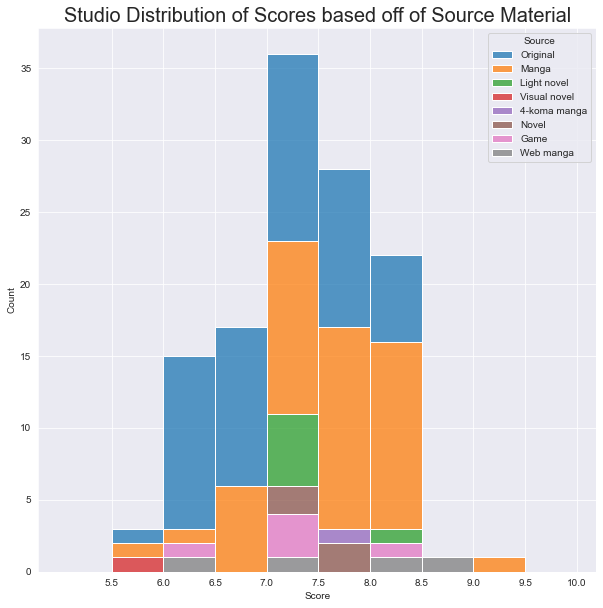

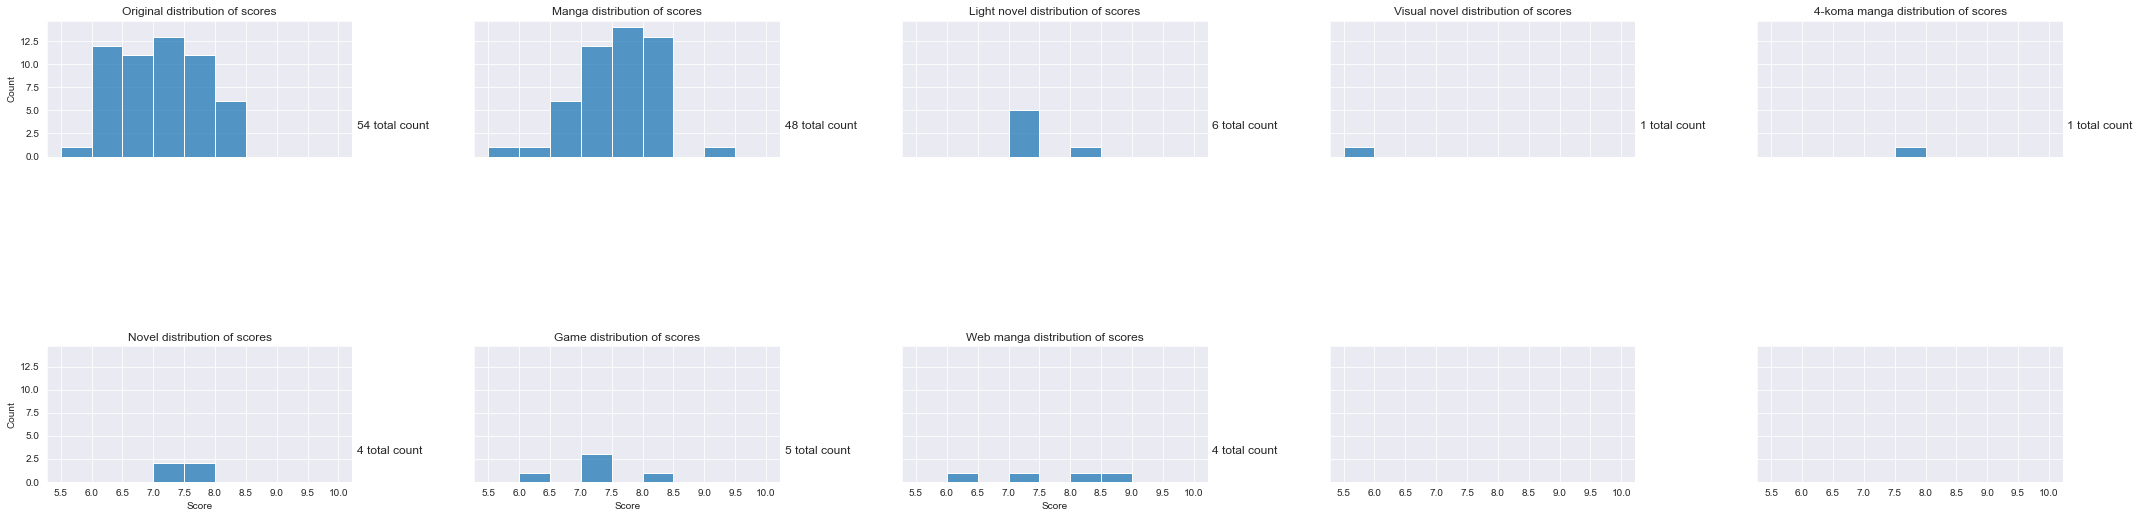

In [138]:
plotStudio(bones)

                                eng_name  Score
9                                Monster   8.76
239                      Fighting Spirit   8.75
1393                          Death Note   8.63
4050      Fighting Spirit:New Challenger   8.67
4462                             Rainbow   8.52
5156                   The Tatami Galaxy   8.61
6474                     Hunter x Hunter   9.10
10451                      One Punch Man   8.57
13286  A Place Further Than The Universe   8.57
14219                      Chihayafuru 3   8.52


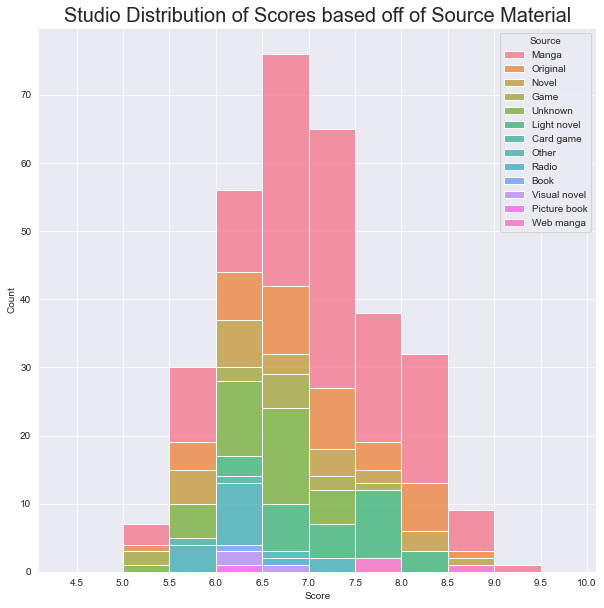

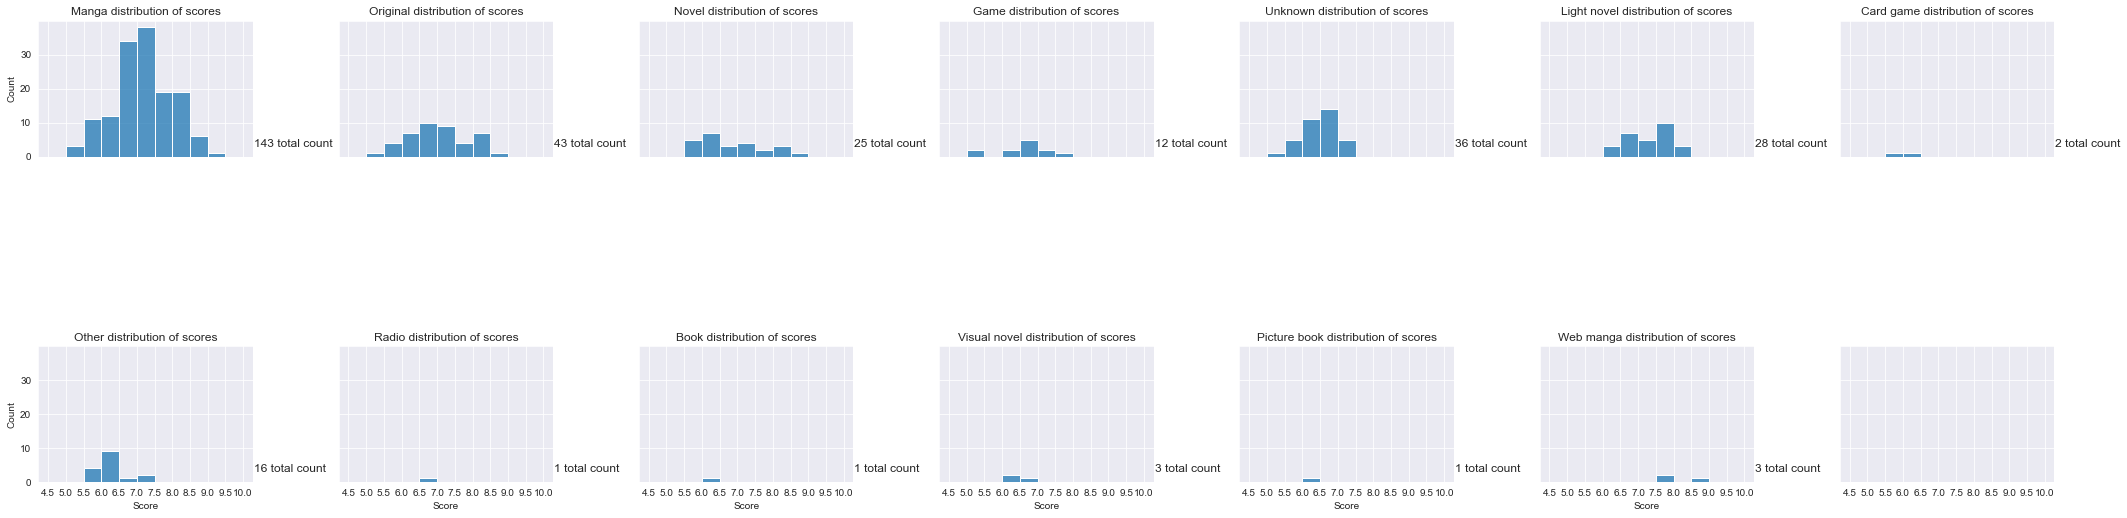

In [139]:
plotStudio(getStudio('Madhouse'))


                                               eng_name  Score
1822                                      Gurren Lagann   8.66
3721  Gurren Lagann The Movie:The Lights in the Sky ...   8.57


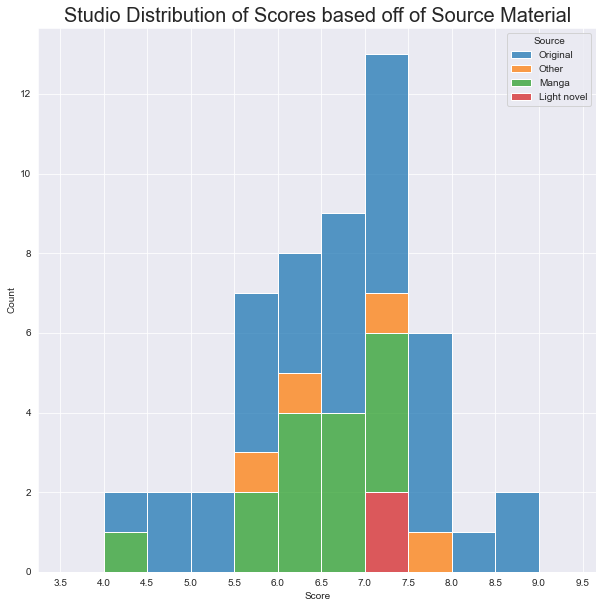

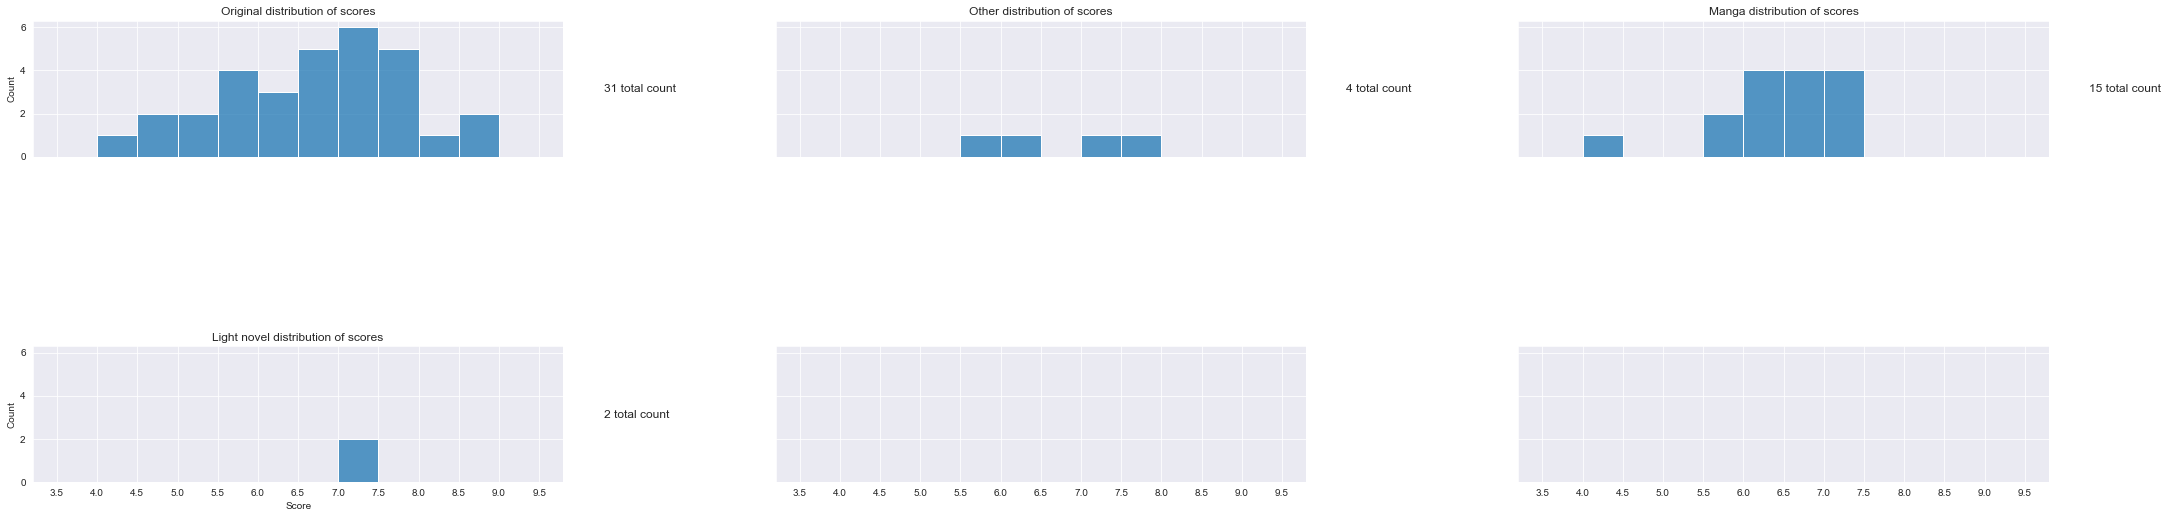

In [140]:
gainax = getStudio('Gainax')
plotStudio(gainax)

In [16]:
g= bones[bones.columns[6:]].columns
s = [bones[x].sum() for x in g ]
summedGenres =  pd.DataFrame(columns=bones[g].columns)
summedGenres.loc[len(summedGenres)] = s

summedGenres
summedGenres.where(lambda x: x > 0)